In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from oetils import init_plotting
from IPython.display import HTML

In [2]:
W = init_plotting()

---

In [3]:
A = 1      # Amplitude of first harmonic
k = np.pi  # Fundamental wave number
v = 1      # Wave speed

x = np.linspace(0, 1, 500)
t = np.linspace(0, 2, 100)
omega = v * k  # Fundamental angular frequency

y1 = A * np.sin(k * x)
y2 = A / (2 * np.sqrt(2)) * np.sin(2 * k * x)
y3 = A / 9 * np.sin(3 * k * x)

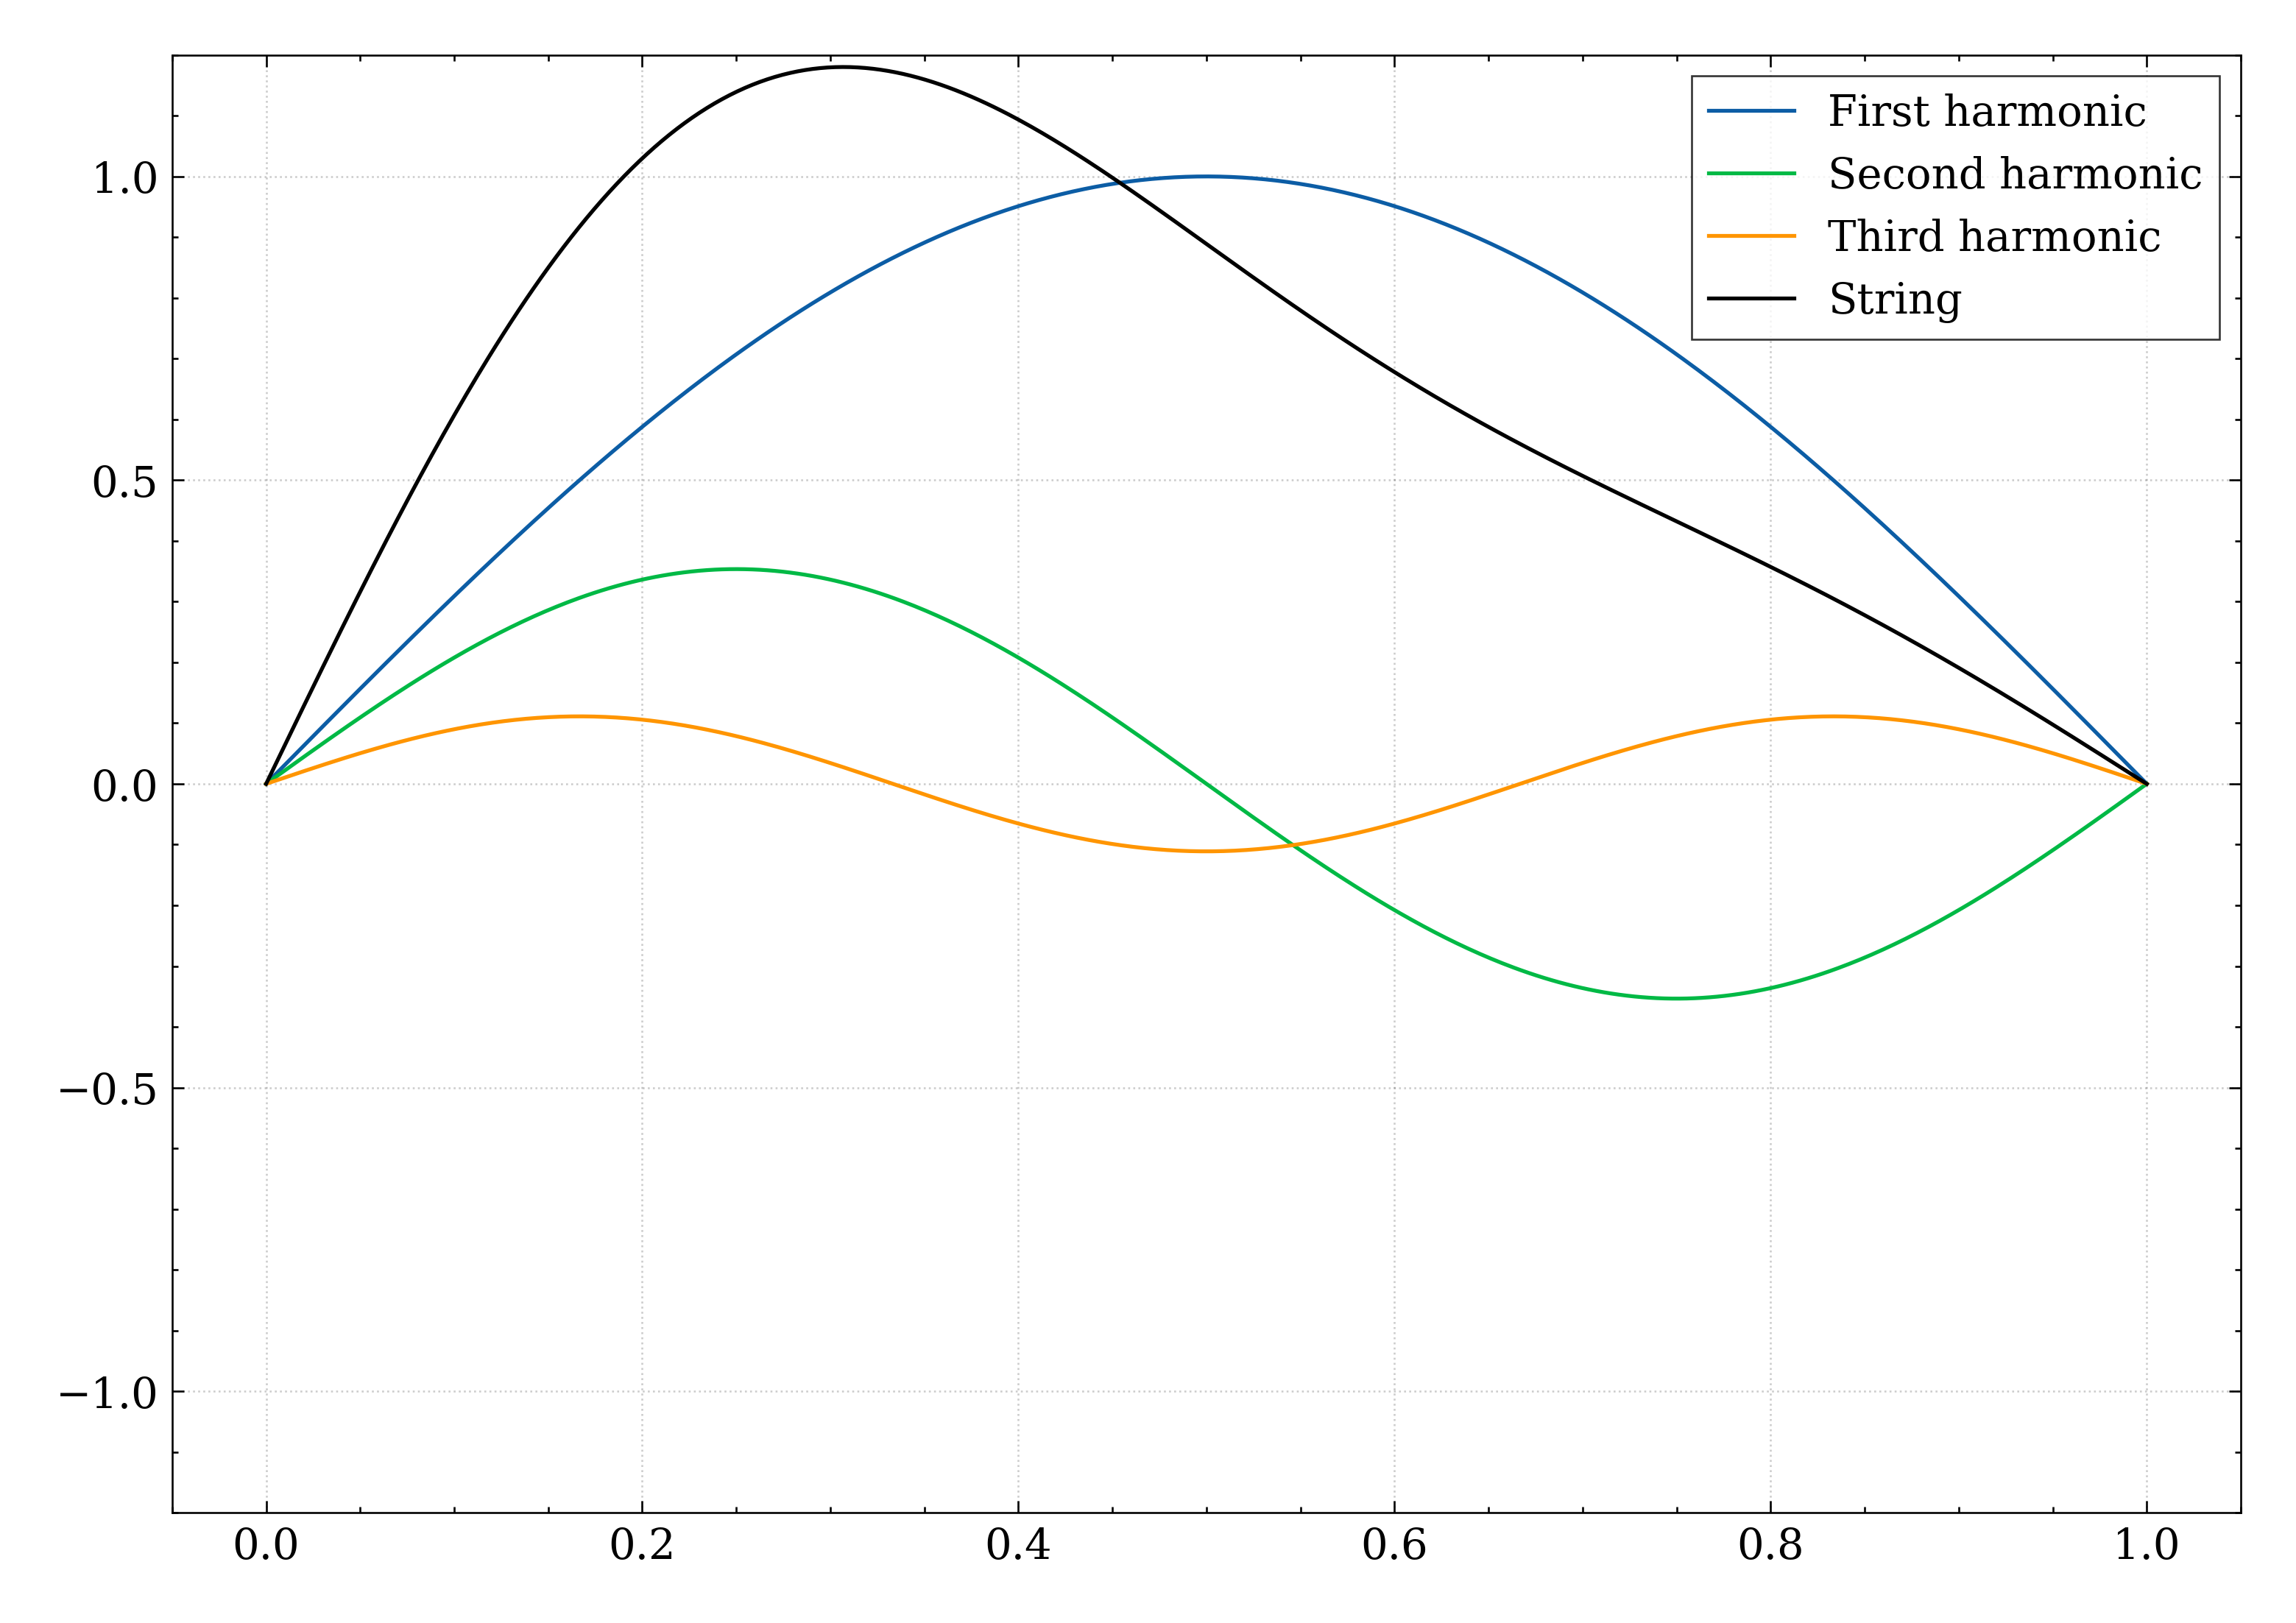

In [4]:
dpi = plt.rcParams["savefig.dpi"]
plt.rcParams["savefig.dpi"] = 120

fig, ax = plt.subplots()

h1, = ax.plot(x, y1, label="First harmonic")
h2, = ax.plot(x, y2, label="Second harmonic")
h3, = ax.plot(x, y3, label="Third harmonic")
string, = ax.plot(x, y1 + y2 + y3, 'k', label="String")

ax.set_ylim(-1.2, 1.2)
ax.legend()
plt.show()

def update(k):
    y1_ = y1 * np.cos(omega * t[k]) 
    y2_ = y2 * np.cos(2 * omega * t[k])
    y3_ = y3 * np.cos(3 * omega * t[k])
    h1.set_ydata(y1_)
    h2.set_ydata(y2_)
    h3.set_ydata(y3_)
    string.set_ydata(y1_ + y2_ + y3_)
    return h1, h2, h3, string

ani = FuncAnimation(fig=fig, func=update, frames=100, interval=30)
ani = ani.to_html5_video()
plt.rcParams["savefig.dpi"] = dpi
HTML(ani)